# Initial visualizations of your data

This notebook is meant to let you quickly look at your post-manually sorted data

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import sys
from ephys import core, events, rasters
import pandas as pd

## Load the data

Set 'block_path' to the path of the folder containing your post-manually sorted data

In [2]:
block_path = '/home/brad/cube/Ice/kperks/B1112/klusta/phy041316/Pen01_Lft_AP300_ML700__Site04_Z3300__B1112_cat_P01_S04_1/'
block_path = '/mnt/cube/btheilma/emily/B1171/klusta/phy103116/Pen02_Lft_AP2500_ML1200__Site14_Z2570__B1171_cat_P02_S14_1/'
block_path = '/mnt/cube/btheilma/emily/B1171/klusta/phy103116/Pen02_Lft_AP2500_ML1200__Site15_Z2780__B1171_cat_P02_S15_1/'
block_path = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site13_Z2641__B604_cat_P01_S13_1/'
block_path = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#block_path = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
spikes     = core.load_spikes(block_path)
clusters   = core.load_clusters(block_path)
trials     = events.load_trials(block_path)
fs         = core.load_fs(block_path)
rec        = 0 

In [ ]:
st = trials[trials['stimulus']=='T3S3D40']
print(st)
stpassiv = st[pd.isnull(st['response'])]
len(stpassiv)

## Plot rasters of each trial from each Good unit for all stims



In [ ]:
reload(rasters)
good_clusters = clusters[clusters['quality']=='Good']
good_cluster_ids = good_clusters['cluster'].unique()
print(len(good_cluster_ids))

In [ ]:
t=np.unique(trials['stimulus'].values)
print(t)
len(t)
stims = trials['stimulus'].unique()
print(stims[4])

In [ ]:
# We have 16 stims, so let's go with a 4x4 subplot layout
subplot_xy = [6, 4]
figsize = (28,20)
period = [-2, 2]

# Make a figure directory
raster_dir = os.path.join(block_path, 'rasters')
if not os.path.exists(raster_dir):
    os.mkdir(raster_dir)

for clusterID in good_cluster_ids:
    print(clusterID)
    fig = rasters.plot_unit_raster_emily(spikes, trials, clusterID, period, rec, fs, subplot_xy, figsize)
    raster_fname = os.path.join(raster_dir, 'unit{}_raster.png'.format(str(clusterID)))
    fig.savefig(raster_fname)
    plt.close(fig)

## See a cell / stim combo that looked interesting?  Plot it here!

In [ ]:
reload(rasters)
clusterID = 9
stims = ['E_scaled_burung', 'C_scaled_burung', 'B_scaled_burung', 'H_scaled_burung']
stims = ['T3S3D-1', 'T3S3D40', 'T3S8D-1', 'T3S8D40', 'T40S40D-1', 'T40S40D3', 'T40S70D-1', 'T40S70D3']
trials_to_plot = trials[trials['stimulus'].isin(stims)]

subplot_xy=[4,2]
figsize=(28, 20)
period=[-2, 2]
# Make a figure directory
raster_dir = os.path.join(block_path, 'rasters')
if not os.path.exists(raster_dir):
    os.mkdir(raster_dir)

fig = rasters.plot_unit_raster_emily(spikes, trials_to_plot, clusterID, period, rec, fs, subplot_xy, figsize)
raster_fname = os.path.join(raster_dir, 'unit{}_raster_specific_stims.png'.format(str(clusterID)))
fig.savefig(raster_fname)
plt.close(fig)

## Plot Average, Gaussian Smoothed PSTHs for each Unit

## Plot rasters of each MUA unit

In [ ]:
mua_clusters = clusters[clusters['quality']=='MUA']
mua_cluster_ids = good_clusters['cluster'].unique()

reload(rasters)
mua_clusters = clusters[clusters['quality']=='MUA']
mua_cluster_ids = mua_clusters['cluster'].unique()
print(len(good_cluster_ids))
# We have 16 stims, so let's go with a 4x4 subplot layout
subplot_xy = [6,4]
figsize = (22,20)
period = [-2, 2]

# Make a figure directory
raster_dir = os.path.join(block_path, 'rasters')
if not os.path.exists(raster_dir):
    os.mkdir(raster_dir)

for clusterID in mua_cluster_ids:
    print(clusterID)
    fig = rasters.plot_unit_raster_emily(spikes, trials, clusterID, period, rec, fs, subplot_xy, figsize)
    raster_fname = os.path.join(raster_dir, 'unit{}_MUAraster.png'.format(str(clusterID)))
    fig.savefig(raster_fname)
    plt.close(fig)

In [5]:
from ephys.spiketrains import get_spiketrain

def plot_trial_raster_emily(spikes, trials, clusters, trialID, 
                            stim, period, rec, fs, plot_params=None, ax=None):

    stim_trials = trials[trials['stimulus']==stim]
    stim_recs = stim_trials['recording'].values
    ntrials = len(stim_trials)

    stim_starts = stim_trials['time_samples'].values
    stim_ends = stim_trials['stimulus_end'].values

    stim_start = stim_starts[trialID]
    stim_end = stim_ends[trialID]
    stim_end_seconds = (stim_end - stim_start)/fs
    srec = stim_recs[trialID]

    clusterIDs = clusters['cluster'].values
    window = [period[0], stim_end_seconds+period[1]]
    raster_data = []
    for clu in clusterIDs:
        sptrain = get_spiketrain(srec, stim_start, clu, spikes, window, fs)
        raster_data.append(sptrain)
    if plot_params == None:
        rasters.do_raster(raster_data, window, [0, stim_end_seconds], ax) 
    else:
        rasters.do_raster(raster_data, window, [0, stim_end_seconds], ax, 
                  spike_linewidth=plot_params['spike_linewidth'],
                  spike_color=plot_params['spike_color'],
                  tick_linewidth=plot_params['tick_linewidth'],
                  tick_color=plot_params['tick_color'])

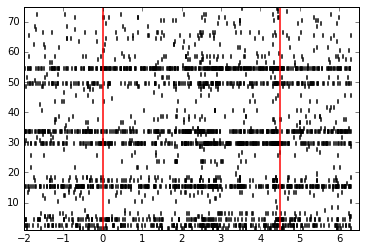

In [14]:
%matplotlib inline
cluster_group = ['Good', 'MUA']
if cluster_group != None:
    mask = np.ones(len(clusters.index)) < 0
    for grp in cluster_group:
        mask = np.logical_or(mask, clusters['quality'] == grp)
goodMUAclusters = clusters[mask]
fig = plt.figure()
ax = plt.gca()
plot_trial_raster_emily(spikes, trials, goodMUAclusters, 6, 'T40S40D3', [-2, 2], 0, fs, ax=ax)
plt.show()

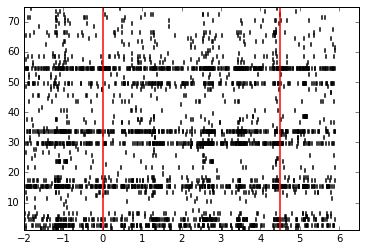

In [15]:
fig = plt.figure()
ax = plt.gca()
plot_trial_raster_emily(spikes, trials, goodMUAclusters, 6, 'T40S70D3', [-2, 2], 0, fs, ax=ax)
plt.show()

# Threshold data and make rasters of thresholded data